# Calibração do sensor de distância infravermelho

In [2]:
# Importação das bibliotecas necessárias para o carregamento dos dados e a criação da curva de calibração
import pandas as pd
import numpy
import matplotlib.pyplot as plt

In [3]:
# Carregamwento dos dados da calibração
dados_calibracao_sensor_iv = pd.read_csv("calibracao_sensor_distancia_iv.csv")
dados_calibracao_sensor_iv

,leituras_analogicas,distancias
0,166,15
1,181,14
2,197,13
3,212,12
4,227,11
5,251,10
6,279,9
7,311,8
8,358,7
9,409,6


In [4]:
'''
Carregamento das séries de entrada e saída da curva de calibração. Como entrada, utiliza-se a leitura analógica do sensor
de distância infravermelho quando exposto a uma barreira física de 15 a 4 cm, com amostras sendo coletadas de 1 em 1 cm.
'''
leituras_analogicas  = dados_calibracao_sensor_iv["leituras_analogicas"]
distancias  = dados_calibracao_sensor_iv["distancias"]

# Curva de calibração do sensor de calibração do sensor descrita por uma equação polinomial de grau 5.
curva_calibracao_sensor_iv = numpy.poly1d(numpy.polyfit(leituras_analogicas, distancias, 5))

print(curva_calibracao_sensor_iv)

          5             4             3             2
2.67e-12 x - 4.795e-09 x + 2.889e-06 x - 0.0006056 x - 0.03497 x + 27.63


In [5]:
# Implementação da curva de calibração no formato de função na sintaxe Python para embarcação no Raspberry Pi Pico
def leitura_para_distancia(valor_sensor_iv):
    distancia_cm = 2.67e-12*valor_sensor_iv**5 - 4.795e-09*valor_sensor_iv**4 + 2.889e-06*valor_sensor_iv**3 - \
                    0.0006056*valor_sensor_iv**2 - 0.03497*valor_sensor_iv+ 27.63
    return distancia_cm

'''
Declaração e preenchimento da série de predição das distâncias por meio dos valores das leituras analógicas 
aplicados na curva de calibração
'''
predicao_curva_calibracao = []
for i in range(len(leituras_analogicas)):
    predicao_curva_calibracao.append(leitura_para_distancia(leituras_analogicas[i]))

R^2:  -0.9738949742354944 SE: 0.0023363387880955323


[]

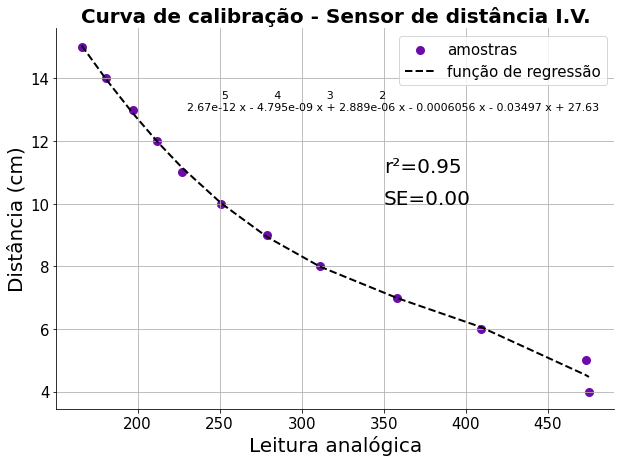

In [18]:
'''
Importação das bibliotecas necessárias para a visualização dos dados coletados, bem como avaliação do desempenho da curva
de calibração.
'''
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Estilização do gráfico com a exclusão de suas de grades da direita e do topo 
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

# Configuração do tamanho da figura que acomodará o gráfico
plt.figure(figsize=(10, 7))

# Definição do título do gráfico e de seus eixos
plt.title("Curva de calibração - Sensor de distância I.V.", fontsize=20, weight="bold")
plt.xlabel("Leitura analógica", fontsize=20)
plt.ylabel("Distância (cm)", fontsize=20)

# Definição do tamanho da fonte dos eixos
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

'''
Avaliação da curva de calibração por meio do coeficiente de determinação (r**2) e erro padrão gerados por uma regressão
linear entre a série de leituras analógicas coletadas durante a calibração e as leituras geradas com a aplicação dos
valores de leitura analógica na curva de calibração.
'''
slope, intercept, r_value, p_value, std_err = linregress(leituras_analogicas, predicao_curva_calibracao)

# Coeficiente de determinação (r**2) e erro padrão
print("R^2: ", r_value, "SE:", std_err)

# Geração do gráfico de dispersão entre a série de leituras analógicas e as distâncias correspondentes durante a calibração
plt.scatter(leituras_analogicas, distancias, lw=3, color = "#6C0BA9", label = "amostras")

# Resultado da curva de calibração alimentada com a série de leituras analógicas coletadas durante a calibração
plt.plot(leituras_analogicas, predicao_curva_calibracao, ls = "--", color="k", lw=2, label = "função de regressão")

# Registro do coeficiente de determinação e erro padrão da cruva de calibração e sua prórpria representação algébrica 
plt.annotate("r²=" + "{:.2f}".format(r_value**2), xy=(350, 11), fontsize=20)
plt.annotate("SE=" + "{:.2f}".format(p_value), xy=(350, 10), fontsize=20)
plt.annotate(curva_calibracao_sensor_iv, xy=(230, 13), fontsize=11)

# Configuração da dimensão da legenda
plt.legend(prop={"size": 15})

# Exibição da grade, como votado pelo prof. Nicola.
plt.grid()

plt.savefig("curva_calibracao_sensor_iv", facecolor="white", dpi=300, transparent=True)

# Exibição do gráfico
plt.plot()
